In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
from glob import glob
from matplotlib import pyplot as plt
from pymea import plotting
from pymea import matlab_compatibility as mc
from datetime import datetime
from pymea import statistics as stat

In [3]:
data_path = '/home/sean/mea data/02/02_spk_freq_table_full.csv'
data_table = pd.read_csv(data_path)

In [4]:
def is_early_top(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row <= 3 and col <= 4:
        return 1
    else:
        return False
    
def is_early_bottom(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row > 3 and col <= 4:
        return True
    else:
        return False
    
def is_late_top(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row <= 3 and col > 4:
        return 1
    else:
        return False
    
def is_late_bottom(unit_name):
    [row,col] = mc.get_row_col_number_tuple(unit_name)
    if row > 3 and col > 4:
        return True
    else:
        return False
    
def is_all(unit_name):
    return True

cond_filt = {
    'Early_All': is_early_top,
    'Early_Some': is_early_bottom, 
    'Late_All': is_late_top,
    'Late_Some': is_late_bottom
}

In [5]:
cat_table = plotting.construct_categorized_dataframe(data_table, cond_filt)

In [6]:
# convert from classic MEA to lumos electrode mapping - only run this once! From then on just load dest_path.
map_path = '/home/sean/mea_analysis/48_Classic_CytoView_Mapping.csv'
dest_path = '/home/sean/mea data/02/02_cat_table_remapped.csv'
cat_table = mc.map_classic_to_lumos(cat_table, map_path, dest_path)

In [7]:
# load csv with converted mapping if created already.
cat_table_orig = pd.read_csv('/home/sean/mea data/02/02_cat_table_remapped.csv')
cat_table_orig['time'] = cat_table_orig['time'].map(mc.remapped_str_to_datetime)

In [8]:
cat_table = cat_table_orig

In [9]:
cat_table['spike_freq'] = cat_table['spike_freq']/60 # convert from spikes/1 minute to spikes/sec
cat_table['spike_freq'] = plotting.smooth(cat_table['spike_freq'], kernel_size=5) # smooth using a 5 minute kernel
cat_table = cat_table.query('spike_freq > 0.05') # eliminate neurons that barely spike

In [10]:
cat_table = pd.concat([
                        cat_table.query('time > "2017-07-31 11:30:00" and time < "2017-07-31 12:30:00"'),
                        cat_table.query('time > "2017-08-01 09:26:00" and time < "2017-08-01 13:15:00"'),
                        cat_table.query('time > "2017-08-02 09:19:00" and time < "2017-08-02 13:09:00"'),
                        cat_table.query('time > "2017-08-03 16:35:00" and time < "2017-08-03 20:25:00"'),
                        cat_table.query('time > "2017-08-04 04:35:00" and time < "2017-08-04 08:25:00"'),
                        cat_table.query('time > "2017-08-07 11:47:00" and time < "2017-08-07 12:32:00"'),
                        cat_table.query('time > "2017-08-08 11:24:00" and time < "2017-08-08 12:14:00"'),
                        cat_table.query('time > "2017-08-09 11:19:00" and time < "2017-08-09 12:09:00"'),
                        cat_table.query('time > "2017-08-10 11:22:00" and time < "2017-08-10 12:12:00"'),
                        cat_table.query('time > "2017-08-14 10:09:00" and time < "2017-08-14 10:59:00"'),
                        cat_table.query('time > "2017-08-15 11:25:00" and time < "2017-08-15 12:15:00"'),
                        cat_table.query('time > "2017-08-15 18:03:00" and time < "2017-08-15 18:53:00"'),
                        cat_table.query('time > "2017-08-16 17:13:00" and time < "2017-08-16 18:03:00"'),
                        cat_table.query('time > "2017-08-17 05:13:00" and time < "2017-08-17 06:03:00"'),
                        cat_table.query('time > "2017-08-18 10:05:00" and time < "2017-08-18 10:55:00"'),
                        cat_table.query('time > "2017-08-18 18:23:00" and time < "2017-08-21 10:33:00"'),
                        cat_table.query('time > "2017-08-21 12:33:00" and time < "2017-08-21 13:43:00"'),])

In [11]:
early_media_changes = ("2017-07-31 13:30:00", "2017-08-04 13:30:00", "2017-08-07 16:00:00", "2017-08-10 16:00:00", 
                      "2017-08-14 14:00:00", "2017-08-17 16:00:00")
late_media_changes = ("2017-07-31 13:30:00", "2017-08-04 13:30:00", "2017-08-08 16:00:00", "2017-08-11 16:00:00", 
                     "2017-08-15 14:00:00", "2017-08-18 13:30:00")

rec_starts = ("2017-07-31 11:35:00", "2017-08-01 09:21:00", "2017-08-02 09:14:00", "2017-08-03 16:30:00", 
             "2017-08-04 04:30:00", "2017-08-07 11:37:00", "2017-08-08 11:19:00", "2017-08-09 11:14:00", 
             "2017-08-10 11:17:00", "2017-08-14 10:04:00", "2017-08-15 11:20:00", "2017-08-15 17:58:00", 
             "2017-08-16 17:08:00", "2017-08-17 05:08:00", "2017-08-18 18:19:00")
rec_ends = ("2017-07-31 12:35:00", "2017-08-01 13:21:00", "2017-08-02 13:14:00", "2017-08-03 20:30:00", 
           "2017-08-04 08:30:00", "2017-08-07 12:37:00", "2017-08-08 12:19:00", "2017-08-09 12:14:00", 
           "2017-08-10 12:17:00", "2017-08-14 11:04:00", "2017-08-15 11:20:00", "2017-08-15 18:58:00", 
           "2017-08-16 18:08:00", "2017-08-17 06:08:00", "2017-08-21 10:38:00")

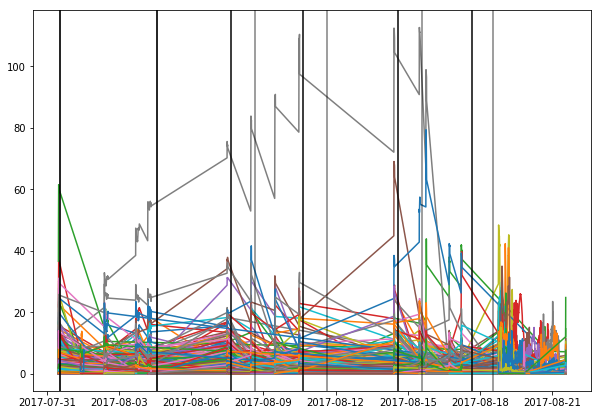

In [33]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table)
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

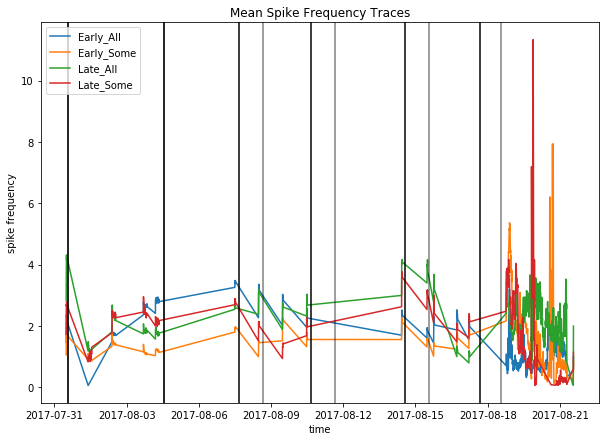

In [34]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table)
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

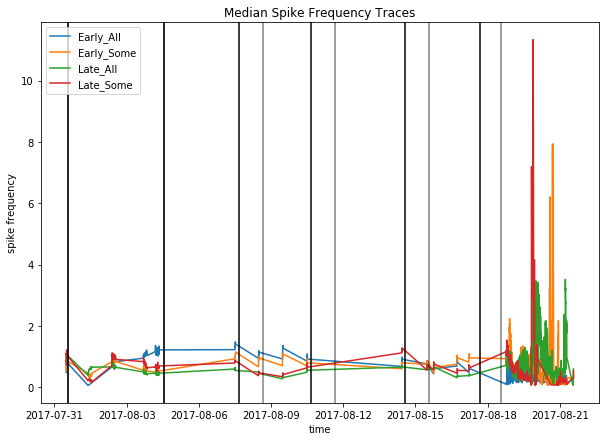

In [74]:
plt.figure(figsize=(10,7))
plotting.plot_median_frequency_traces(cat_table)
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

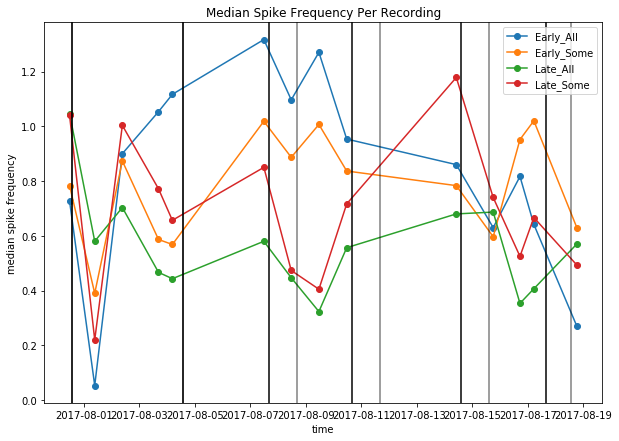

In [35]:
plt.figure(figsize=(10,7))
plotting.plot_medians_per_rec(cat_table, rec_starts, rec_ends, 15, yscale = 'linear')
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

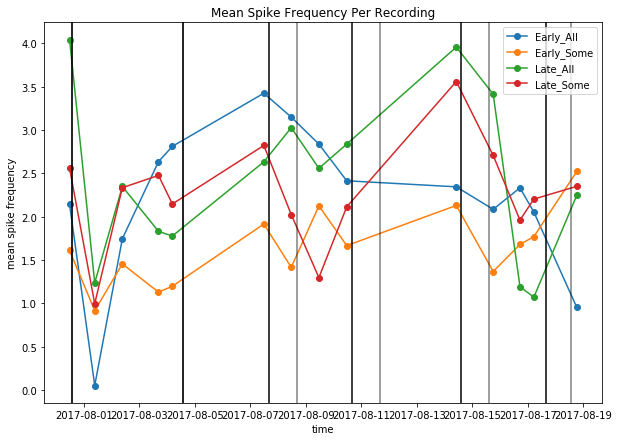

In [19]:
plt.figure(figsize=(10,7))
plotting.plot_means_per_rec(cat_table, rec_starts, rec_ends, 15, yscale = 'linear')
for x in early_media_changes:
    plt.axvline(x, color = 'k')
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

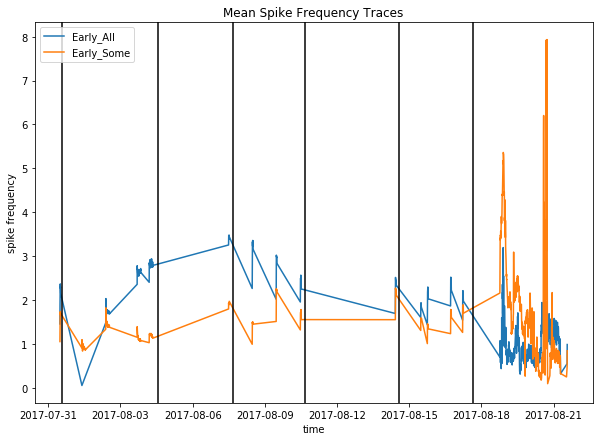

In [36]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table.query('condition == "Early_All" or condition == "Early_Some"'))
for x in early_media_changes:
    plt.axvline(x, color = 'k')

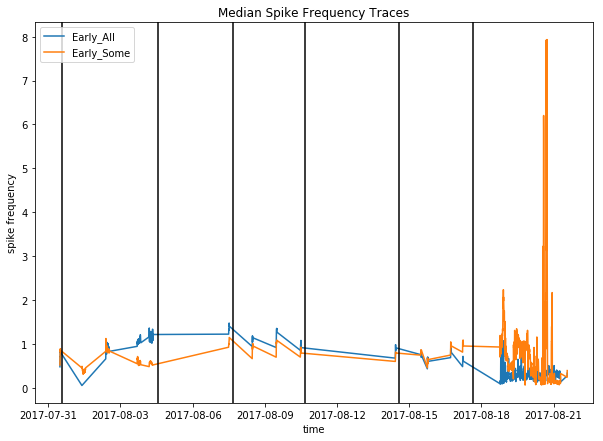

In [37]:
plt.figure(figsize=(10,7))
plotting.plot_median_frequency_traces(cat_table.query('condition == "Early_All" or condition == "Early_Some"'))
for x in early_media_changes:
    plt.axvline(x, color = 'k')

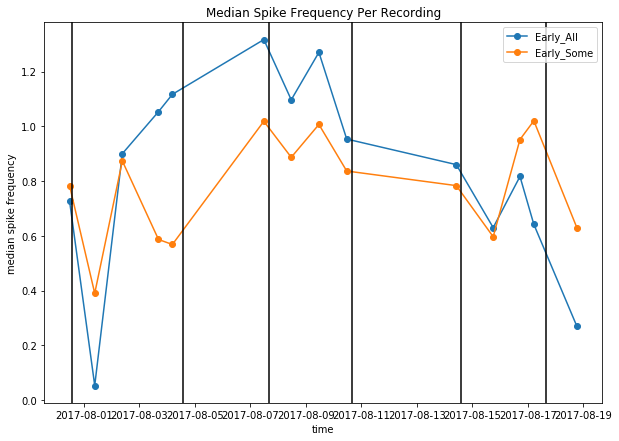

In [38]:
plt.figure(figsize=(10,7))
plotting.plot_medians_per_rec(cat_table.query('condition == "Early_All" or condition == "Early_Some"'), rec_starts, rec_ends, 15)
for x in early_media_changes:
    plt.axvline(x, color = 'k')

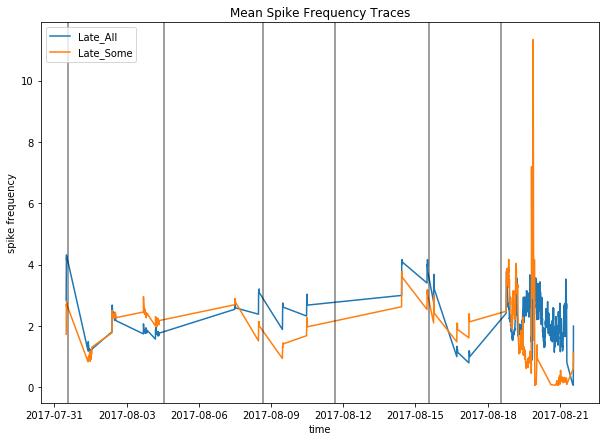

In [39]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table.query('condition == "Late_All" or condition == "Late_Some"'))
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

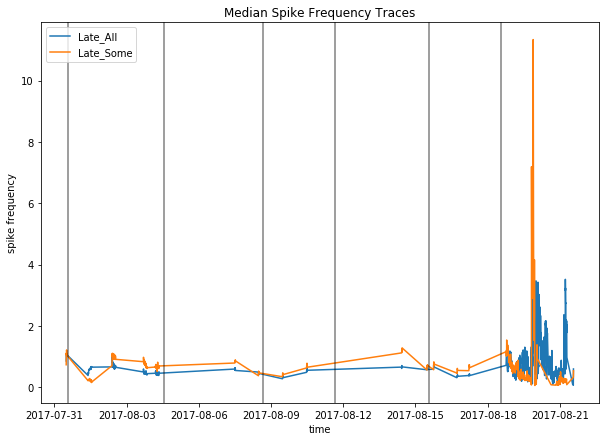

In [40]:
plt.figure(figsize=(10,7))
plotting.plot_median_frequency_traces(cat_table.query('condition == "Late_All" or condition == "Late_Some"'))
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

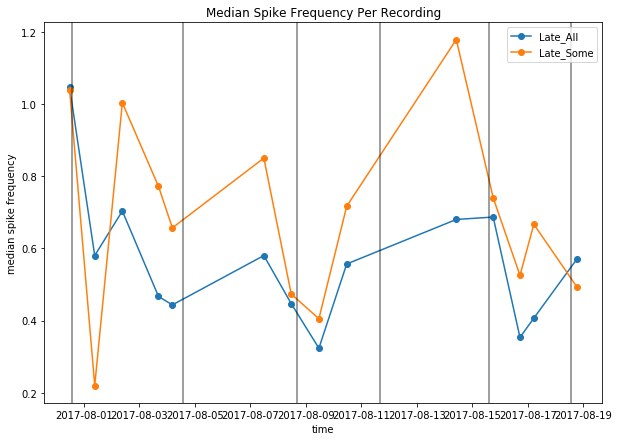

In [41]:
plt.figure(figsize=(10,7))
plotting.plot_medians_per_rec(cat_table.query('condition == "Late_All" or condition == "Late_Some"'), rec_starts, rec_ends, 15)
for x in late_media_changes:
    plt.axvline(x, color = 'k', alpha = 0.5)

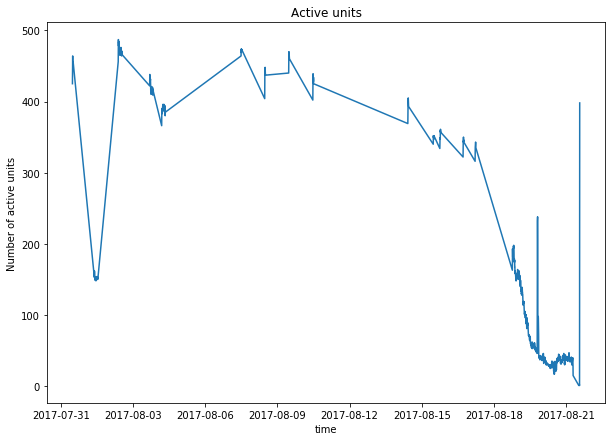

In [65]:
plt.figure(figsize=(10,7))
active_count = plotting.count_active_neurons(cat_table, 0.05, 0)

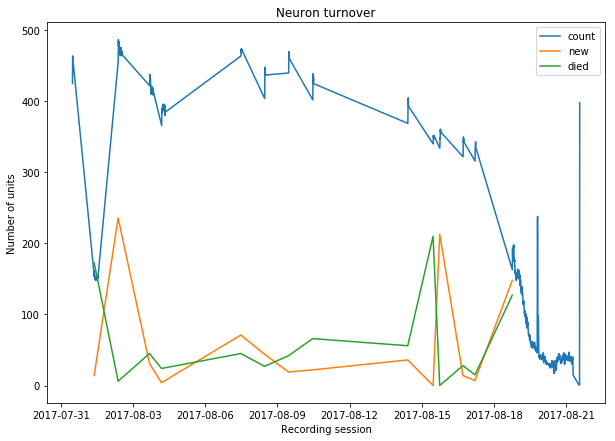

In [64]:
plt.figure(figsize=(10,7))
active_count = plotting.count_active_neurons(cat_table, 0.05, 0)
plotting.compare_active_per_recording(cat_table.query('condition == "Early_All" or condition == "Early_Some"'), 0.05, rec_starts, rec_ends)

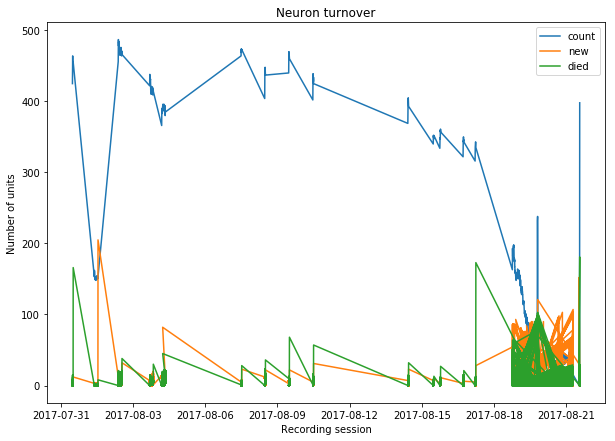

In [73]:
plt.figure(figsize=(10,7))
active_count = plotting.count_active_neurons(cat_table, 0.05, 0)
plotting.compare_active_per_sec(cat_table.query('condition == "Early_All" or condition == "Early_Some"'), 0.05)

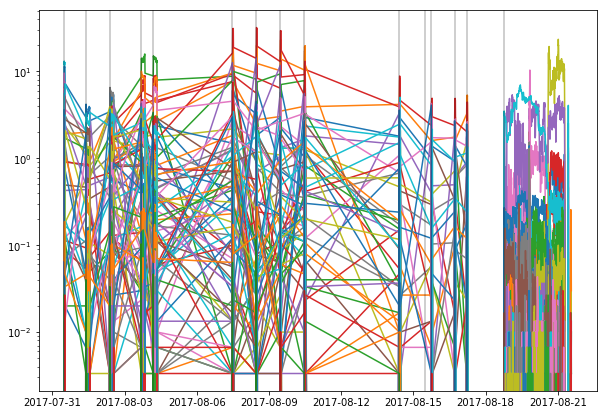

In [197]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table.query('unit_name < "B1111" and unit_name > "A3111"'))
plt.yscale('log')
for x in rec_starts:
    plt.axvline(x, color = 'k', alpha = 0.25)

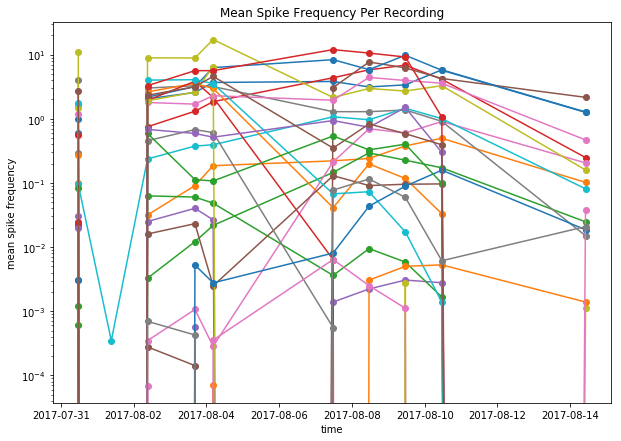

In [257]:
plt.figure(figsize=(10,7))
plot_unit_means_per_rec(cat_table.query('unit_name >= "B2111" and unit_name < "B3111"'),rec_starts,rec_ends,11)

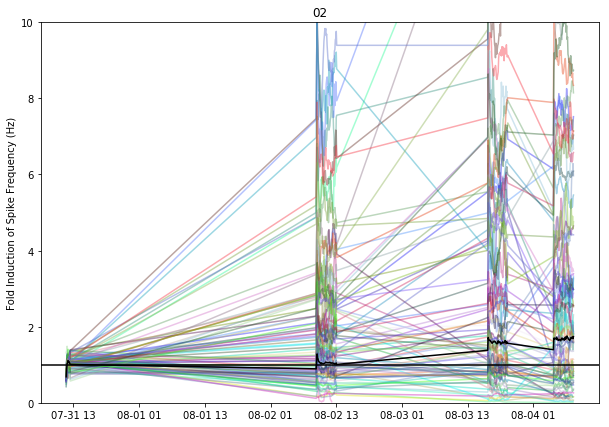

In [37]:
plt.figure(figsize=(10,7))
baseline_table = cat_table.query('time > "2017-07-31 11:30:00" and time < "2017-07-31 12:30:00"')
stim_table = cat_table.query('time > "2017-07-31 12:30:00" and time < "2017-08-04 08:25:00"')
cat_table2 = cat_table.query('time > "2017-07-31 11:30:00" and time < "2017-08-04 08:25:00"')
plotting.foldInductionPlusMean(cat_table2, baseline_table, stim_table, "Early_All", '02', ind_filter = False, var = 2.5, minHz = 0.01, maxHz = 10000, ymax = 10)

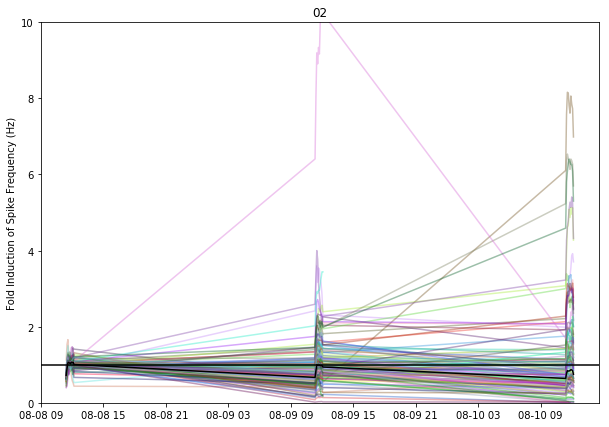

In [38]:
plt.figure(figsize=(10,7))
baseline_table = cat_table.query('time > "2017-08-08 11:24:00" and time < "2017-08-08 12:14:00"')
stim_table = cat_table.query('time > "2017-08-08 12:14:00" and time < "2017-08-10 12:12:00"')
cat_table2 = cat_table.query('time > "2017-08-08 11:24:00" and time < "2017-08-10 12:12:00"')
plotting.foldInductionPlusMean(cat_table2, baseline_table, stim_table, "Early_All", '02', ind_filter = False, var = 2.5, minHz = 0.01, maxHz = 10000, ymax = 10)

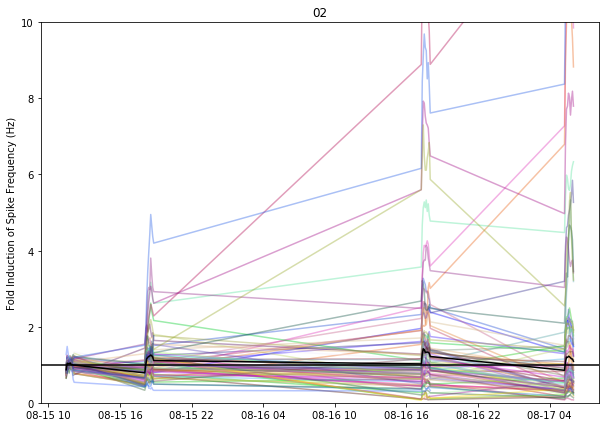

In [39]:
plt.figure(figsize=(10,7))
baseline_table = cat_table.query('time > "2017-08-15 11:25:00" and time < "2017-08-15 12:15:00"')
stim_table = cat_table.query('time > "2017-08-15 12:15:00" and time < "2017-08-17 06:03:00"')
cat_table2 = cat_table.query('time > "2017-08-15 11:25:00" and time < "2017-08-17 06:03:00"')
plotting.foldInductionPlusMean(cat_table2, baseline_table, stim_table, "Early_All", '02', ind_filter = False, var = 2.5, minHz = 0.01, maxHz = 10000, ymax = 10)